In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import random as random

from matplotlib.colors import ListedColormap

%load_ext autoreload
%autoreload 2

In [2]:
milk_data = pd.read_csv('../Data/TheData.csv')
milk_data['DateTime'] = pd.to_datetime(milk_data['DateTime'], errors='coerce')
milk_data['StartTime'] = pd.to_datetime(milk_data['StartTime'], format='%H:%M:%S', errors='coerce').dt.time
milk_data['StartDate'] = pd.to_datetime(milk_data['StartDate'], errors='coerce')

Merging weather and milk data: 100%|██████████| 9/9 [00:15<00:00,  1.71s/farm]


In [3]:
milk_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperature,Relative Humidity,Precipitation,THI,THI_adj,HW,cum_HW
1,a624fb9a,SE-a624fb9a-1425,1425,2022-04-14,17:53:00,1,42.0,7.68,2022-04-14 17:53:00,01 SRB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
2,a624fb9a,SE-a624fb9a-1212,1212,2022-04-14,17:45:00,5,192.0,9.58,2022-04-14 17:45:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
3,a624fb9a,SE-a624fb9a-1299,1299,2022-04-14,17:54:00,3,138.0,10.94,2022-04-14 17:54:00,01 SRB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
4,a624fb9a,SE-a624fb9a-1412,1412,2022-04-14,17:12:00,1,107.0,6.12,2022-04-14 17:12:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
5,a624fb9a,SE-a624fb9a-1200,1200,2022-04-14,17:25:00,5,72.0,11.63,2022-04-14 17:25:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


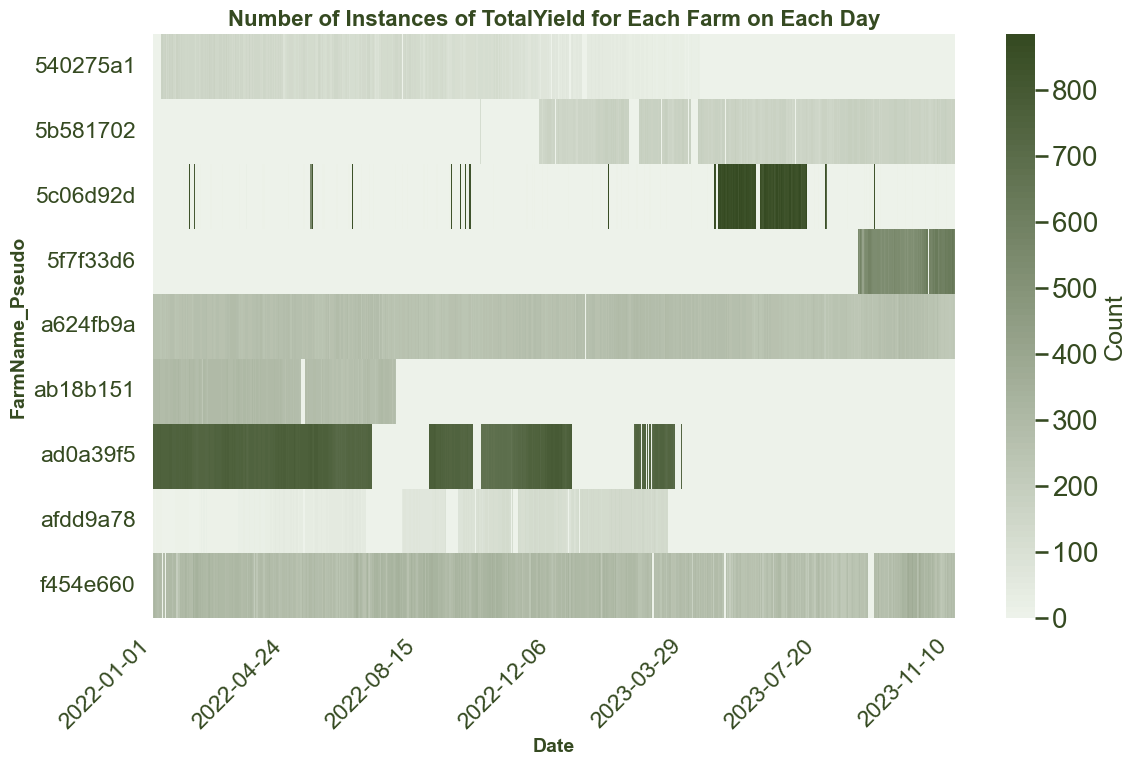

In [22]:
# Set the theme and context for the plot
sns.set_theme()
sns.set_context("talk")
custom_color = '#354A21'
custom_cmap = ListedColormap(['#EFEBE2', custom_color])
# Group the data by 'FarmName_Pseudo' and 'StartDate', and get the count of 'TotalYield'
count_data = milk_data.groupby(['FarmName_Pseudo', 'StartDate'])['TotalYield'].count().reset_index(name='Count')

# Convert 'StartDate' to datetime
count_data['StartDate'] = pd.to_datetime(count_data['StartDate'])

# Sort the data by 'StartDate' to ensure the labels match the ticks
count_data.sort_values('StartDate', inplace=True)

# Pivot to have 'StartDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='StartDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
#ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})
ax = sns.heatmap(pivot_data, cmap=sns.light_palette(custom_color, 100, input='rgb'), cbar_kws={'label': 'Count'})
cbar1 = ax.collections[0].colorbar
cbar1.ax.tick_params(labelsize=20, colors='#354A21')
cbar1.set_label('Count', color=custom_color)
# Get the number of days between each tick
num_days = len(pivot_data.columns)
days_between_ticks = num_days // 6  # Adjust this as needed for your specific dataset

# Set the x-tick labels with selected frequency
ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')

# Set the labels with the specified font sizes
plt.xlabel('Date', fontsize=14,  color='#354A21', weight='bold')
plt.ylabel('FarmName_Pseudo', fontsize=14, color='#354A21', weight='bold')
plt.title('Number of Instances of TotalYield for Each Farm on Each Day', fontsize=16,  color='#354A21', weight='bold')
plt.tick_params(axis='x', colors='#354A21')
plt.tick_params(axis='y', colors='#354A21')
# Ensure the layout fits well
plt.tight_layout()
plt.legend(framealpha=0)
# Display the plot
#plt.show()
plt.savefig('heatmap.png', transparent=True)

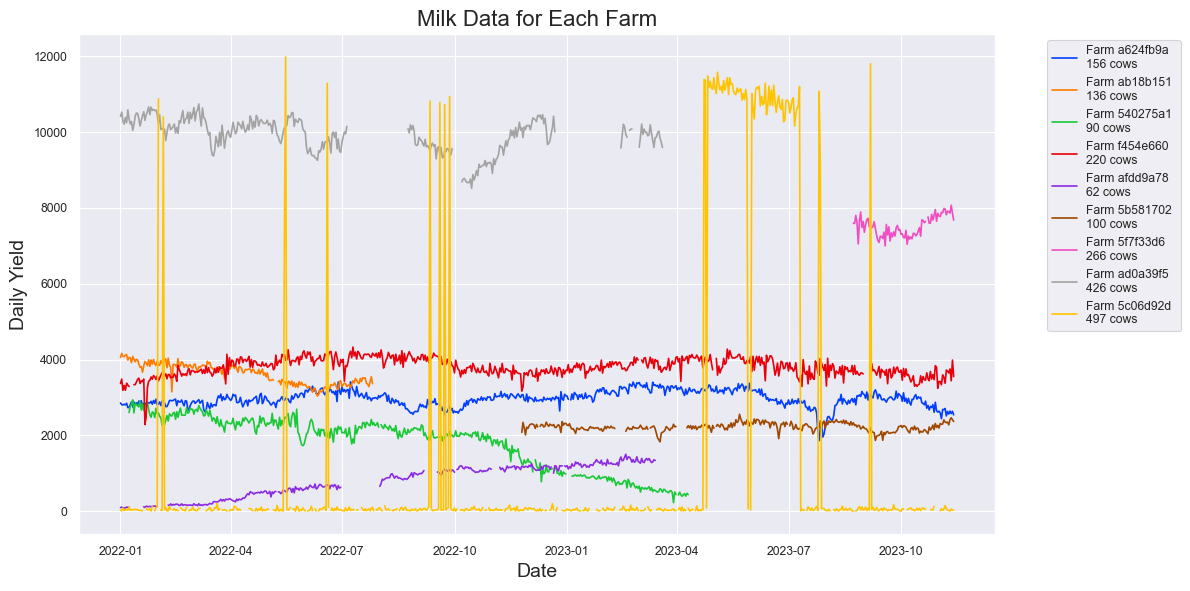

In [18]:
# Set the Seaborn theme and context
sns.set_theme()
sns.set_context("paper")

# Define the list of farms
list_of_farms = list(milk_data["FarmName_Pseudo"].unique())

# Initialize the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    selected_farm = processor.get_farm(farm)
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    missing_dates = all_dates.difference(daily_yield.index)
    daily_yield = daily_yield.reindex(all_dates)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)

# Set the title and labels with the specified font sizes
ax.set_title('Milk Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Yield', fontsize=14)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid to the plot
plt.grid(True)

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
sick_data = processor.get_sick_data()
sick_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,HealthEventDate,DiagnosisName,TreatmentName,HealthEventOccurred
0,a624fb9a,SE-a624fb9a-1258,1258.0,2022-02-22,Follicle left,Receptal,True
1,a624fb9a,SE-a624fb9a-1298,1298.0,2022-03-25,Pyometra,Dinolytic,True
2,a624fb9a,SE-a624fb9a-1267,1267.0,2022-04-19,Clinical mastitis,NaN,True
3,a624fb9a,SE-a624fb9a-1200,1200.0,2022-04-21,Clinical mastitis,Penethaone,True
4,a624fb9a,SE-a624fb9a-1416,1416.0,2022-07-19,Clinical mastitis,Loxicom,True


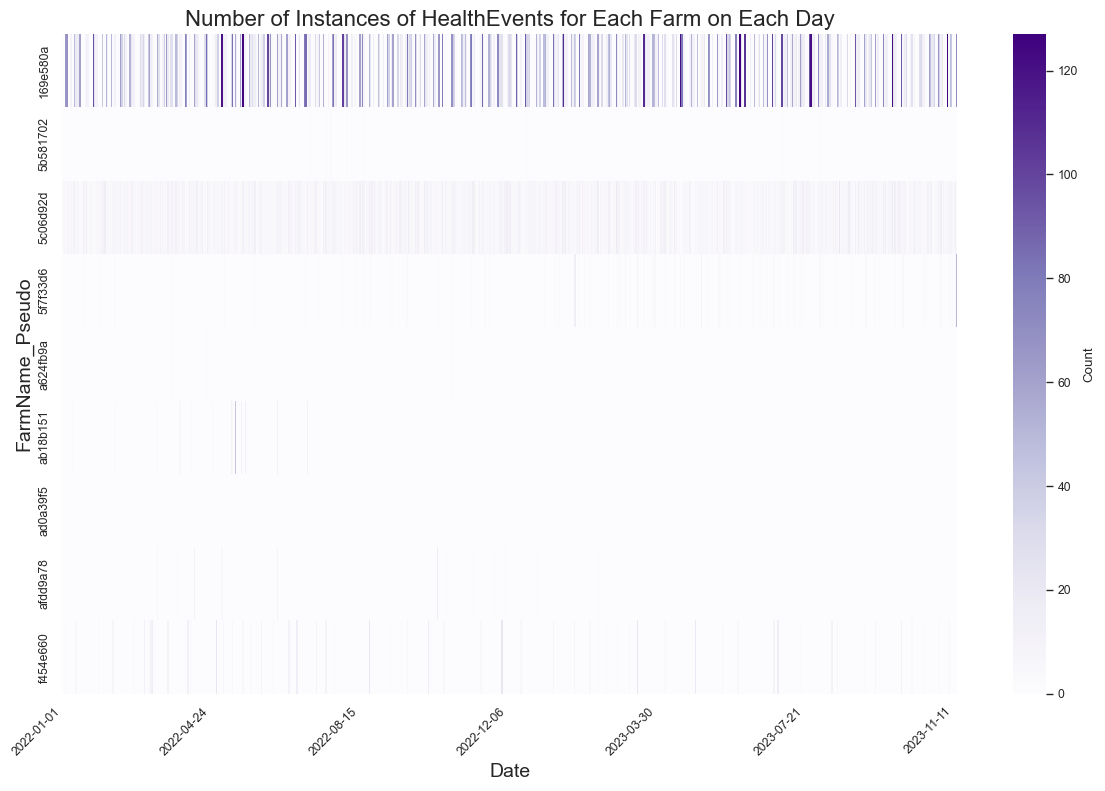

In [20]:
# Set the theme and context for the plot
sns.set_theme()
sns.set_context("paper")

# Group the data by 'FarmName_Pseudo' and 'StartDate', and get the count of 'TotalYield'
count_data = sick_data.groupby(['FarmName_Pseudo', 'HealthEventDate'])['HealthEventOccurred'].count().reset_index(name='Count')

# Convert 'HealthEventDate' to datetime
count_data['HealthEventDate'] = pd.to_datetime(count_data['HealthEventDate'])

# Sort the data by 'HealthEventDate' to ensure the labels match the ticks
count_data.sort_values('HealthEventDate', inplace=True)

# Pivot to have 'HealthEventDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='HealthEventDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})

# Get the number of days between each tick
num_days = len(pivot_data.columns)
days_between_ticks = num_days // 6  # Adjust this as needed for your specific dataset

# Set the x-tick labels with selected frequency
ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')

# Set the labels with the specified font sizes
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Instances of HealthEvents for Each Farm on Each Day', fontsize=16)

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()